In [ ]:
# !pip install selenium
#

In [2]:
import selenium.webdriver as selWeb
from bs4 import BeautifulSoup
import requests
import re
import time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import platform
rc('font', family='AppleGothic')
import time
from termcolor import colored
import tqdm

%load_ext autoreload
%autoreload 2

In [3]:
def company_info(i,cdf):
    company = cdf['company'][i]
    comp_id = cdf['comp_id'][i]
    return company, comp_id


def page_num_info(url):
    response = client.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    total_num = int(soup.find("title").text.split()[1][:-1])
    page_num = int(total_num / 5) + 1
    return page_num, total_num

def bump():
    bw.comp_lst.append(webb.comp_lst)
    bw.user_lst.append(webb.user_lst)
    bw.dept_lst.append(webb.dept_lst)
    bw.titl_lst.append(webb.titl_lst)
    bw.dat1_lst.append(webb.dat1_lst)
    bw.diff_lst.append(webb.diff_lst)
    bw.dat2_lst.append(webb.dat2_lst)
    bw.rout_lst.append(webb.rout_lst)
    bw.head_lst.append(webb.head_lst)
    bw.ress_lst.append(webb.ress_lst)
    bw.good_lst.append(webb.good_lst)
    bw.mask_lst.append(webb.mask_lst)
    bw.fell_lst.append(webb.fell_lst)
    bw.took_lst.append(webb.took_lst)
    
def creat_table():#company_lst, position_lst, title_lst, record_date_lst, difficulty_lst, interview_date_lst, channel_lst, headline_lst, interview_res_lst, interview_exp_lst, interview_question_lst, answer_thought_lst, announce_duration_lst):
    comp_lst = sum(bw.comp_lst, [])
    user_lst = sum(bw.user_lst, [])
    dept_lst = sum(bw.dept_lst, [])
    titl_lst = sum(bw.titl_lst, [])
    dat1_lst = sum(bw.dat1_lst, [])
    diff_lst = sum(bw.diff_lst, [])
    dat2_lst = sum(bw.dat2_lst, [])
    rout_lst = sum(bw.rout_lst, [])
    head_lst = sum(bw.head_lst, [])
    ress_lst = sum(bw.ress_lst, [])
    good_lst = sum(bw.good_lst, [])
    mask_lst = sum(bw.mask_lst, [])
    fell_lst = sum(bw.fell_lst, [])
    took_lst = sum(bw.took_lst, [])
    
#     dat1_lst = [datetime.datetime.strptime(i, '%Y%m%d').date() for i in dat1_lst]
    
    df = pd.DataFrame()
    df['company'] = comp_lst
    df['user_id'] = user_lst
    df["dptment"] = dept_lst
    df["title"] = titl_lst
    df["jp_date"] = dat1_lst
    df["difficult"] = diff_lst
    df["on_date"] = dat2_lst
    df["route"] = rout_lst
    df["headline"] = head_lst
    df["question"] = mask_lst
    df["thought"] = fell_lst
    df["duration"] = took_lst
    df["result"] = ress_lst
    df["experience"] = good_lst
    
    df['jp_date'] = df['jp_date'].astype("datetime64")
    df['on_date'] = df['on_date'].astype("datetime64")

    print(df.shape)
    return df

# 1. 데이터 수집하는 프로그램
- 잡플래닛에서 데이터 수집하는 프로그램
- 동종업계 및 일하고 싶은 회사 리스트 만들기
- 리스트에 있는 회사에 면접을 본 사람들의 데이터 수집하기
- 데이터 전치리 및 클린징
- 데이터 형태로 변환

## 1-1.회사 리스트 만들기

#### 2019년 기준 자료 참고

- 동종업계: 
    - https://cremadot.tistory.com/26
- 일하고 싶은 회사: 
    - http://info.incruit.com/pr/likecompany.asp
- 잡플래닛 기업 만족도 순위
    - https://www.jobplanet.co.kr/companies?sort_by=review_avg_cache

#### 직접 구현한 프로그램 불러오기

In [4]:
import bighit_web as bw
from bighit_web import web

#### 잡 플래닛에 접근하기

In [5]:
jobplanet_id = bw.jobplanet_id
jobplanet_pw = bw.jobplanet_pw
login_url = bw.login_url

login_data = {'user': {'email':jobplanet_id, 'password':jobplanet_pw, 'remember_me':'true'}}
client = requests.session()
login_res = client.post(login_url, json = login_data)

print(login_res.content.decode('utf-8'))
index = client.get(login_url)

{"success":true,"redirect_url":"https://www.jobplanet.co.kr/"}


#### 기업 고유 데이터 생성하기
- 예제로 55개의 기업
- _회사 리스트는 계속 추가 가능_

In [6]:
config = {}
## 동종 업계
config['빅히트엔터테인먼트'] = 141319
config['제이와이피엔터테인먼트'] = 56418
config['에스엠엔터테인먼트'] = 65748
config['플레디스엔터테인먼트'] = 338370
config['와이지엔터테인먼트'] = 61826
config['스타쉽엔터테인먼트'] = 93175
config['젤리피쉬엔터테인먼트'] = 89833
config['큐브엔터테인먼트'] = 93131
config['판타지오'] = 87432
config['알비더블유'] = 324856
config['에프앤씨엔터테인먼트'] = 92816
config['젤리피쉬엔터테인먼트'] = 89833
config['로엔엔터테인먼트'] = 78734
config['씨제이이앤엠'] = 23192
config['스타쉽엔터테인먼트'] = 93175

## 일하고 싶은 회사
config['카카오'] = 93880
config['네이버'] = 42217
config['엔에이치엔'] = 88463
config['삼성전자'] = 30139
config['에스케이하이닉스'] = 20561
config['대한항공'] = 81661
config['씨제이제일제당'] = 23189
config['아모레퍼시픽'] = 68464
config['포스코'] = 50130
config['현대자동차'] = 1289
config['호텔신라'] = 47377

## 잡플래닛 총 만족도 순위
config['페이스북코리아'] = 90364
config['드라마앤컴퍼니'] = 80176
config['KSS해운'] = 53479
config['유니티테크놀로지스코리아'] = 94877
config['구글코리아'] = 44566
config['맥킨지인'] = 34841
config['벡터코리아아이티'] = 75756
config['삼성인력개발원'] = 91191
config['퀄컴코리아'] = 6991
config['베인앤드컴퍼니코리아'] = 32346
config['유풍'] = 59586
config['에스케이이노베이션'] = 20596
config['크몽'] = 90053
config['민앤지'] = 307694
config['뤼이드'] = 94714
config['아세아시멘트'] = 22669
config['SAP랩스코리아'] = 20862
config['기아자동차'] = 43248
config['SK텔레콤'] = 20575
config['한국MSD'] = 3294
config['한국코카콜라'] = 3025
config['이랜서'] = 59119
config['도요엔지니어링코리아'] = 38328
config['아마존웹서비스'] = 89330
config['코스콤'] = 52769
config['비바리퍼블리카'] = 309507
config['도서출판길벗'] = 86938
config['버즈니'] = 75938
config['한국로슈'] = 48837
config['한국쓰리엠'] = 3419
config['샌드박스네트워크'] = 314301


cdf = pd.DataFrame({'company':[i for i in config.keys()],
                    'comp_id':[i for i in config.values()]})

page_lst = []
applicant = []

for i in range(0, len(cdf)):
    company, comp_id = company_info(i, cdf)
    url = "https://www.jobplanet.co.kr/companies/{}/interviews/{}?page=1".format(comp_id, company)
    page_num, total_num = page_num_info(url)
    applicant.append(total_num)
    page_lst.append(page_num)

cdf['applicant'] = applicant
cdf['total_page'] = page_lst
cdf

,company,comp_id,applicant,total_page
0,빅히트엔터테인먼트,141319,45,10
1,제이와이피엔터테인먼트,56418,120,25
2,에스엠엔터테인먼트,65748,404,81
3,플레디스엔터테인먼트,338370,25,6
4,와이지엔터테인먼트,61826,183,37
5,스타쉽엔터테인먼트,93175,9,2
6,젤리피쉬엔터테인먼트,89833,43,9
7,큐브엔터테인먼트,93131,23,5
8,판타지오,87432,16,4
9,알비더블유,324856,25,6


## 1-2. 데이터 생성
- 직접 구현한 프로그램으로 웹에서 데이터 수집
- 수집한 데이터 정제 및 전처리
- 데이터 Qualification 체크 및 최종 확인
- 데이터 형태로 산출하기

#### 직접 구현 프로그램 불러오기

In [8]:
import bighit_web as bw
from bighit_web import web

#### 데이터 생성

In [9]:
%%time

page = cdf['total_page']
coID = cdf['comp_id']
coNM = cdf['company']

for num in range(0, len(cdf)): 
    progress_bar = tqdm.tqdm(total=cdf['total_page'].iloc[num],
                             desc=cdf['company'].iloc[num], 
                             position=0)
    for i in range(0, page.iloc[num]):
        url = "https://www.jobplanet.co.kr/companies/{}/interviews/{}?page={}\
              ".format(coID.iloc[num], coNM.iloc[num], i+1)
        response = client.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        
        webb = web(soup, company)
        all_info = soup.find_all('div', {'class': 'content_wrap'})
        if len(all_info) == 0:
            break
        else:      
            company = coNM.iloc[num]
            webb.crawl(soup, company)
            bump()
        progress_bar.update(1)
df = creat_table()
df.head(3)

샌드박스네트워크: 100%|██████████| 11/11 [00:22<00:00,  2.35s/it]

(2985, 14)
CPU times: user 4min 4s, sys: 2.84 s, total: 4min 6s
Wall time: 2h 32min 46s


,company,user_id,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience
0,빅히트엔터테인먼트,770112,마케팅/시장조사,대리,2019-12-05,보통,2019-10-01,기타,서류 합격 후 면접 관련 안내는 이메일을 통해서 통지됨. 면접 안내하시는 분 굉장히...,1. 왜 해당 직무를 선택하였는지. 성격의 장단점3. 지금 다니고 있는 회사와 빅히...,회사가 지금 커져가고있다는 점을 굉장히 많이 크게 강조함입사하면 바쁠거라는점......,7.0,불합격,보통
1,빅히트엔터테인먼트,769347,미디어/홍보,사원-대졸,2019-12-04,보통,NaT,None,비교적 자유로운 분위기였으며 긴장을 덜어주시려고 해주셔서 감사합니다,최근 트렌드에 대해 알고계시나요?(장르불문)상사와 의견이 맞지 않는다면 어떻게 대처...,None,30.0,대기중,긍정적
2,빅히트엔터테인먼트,768930,디자인,사원-대졸,2019-12-04,보통,2019-09-01,온라인지원,"전체적으로 밝은 느낌이였으나, 일부러 어려운 용어를 써가며 질문을 하려는 태도에서 ...","다소 불편한 질문들이 많았는데, 그 중 프로그램 용어에 대해 아는지에 대한 여부를 ...",뭐 아는대로 대답했긴 했지만 썩 표정이 안좋았다.,5.0,합격,부정적


#### 데이터 로컬로 저장

In [10]:
df.to_csv('job_market.csv', index = False )

#### 로컬에 저장한 데이터 다시 불러오기

In [10]:
df = pd.read_csv('job_market.csv')
print(df.shape)
df.head(3)

(2985, 14)


,company,user_id,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience
0,빅히트엔터테인먼트,770112,마케팅/시장조사,대리,2019-12-05,보통,2019-10-01,기타,서류 합격 후 면접 관련 안내는 이메일을 통해서 통지됨. 면접 안내하시는 분 굉장히...,1. 왜 해당 직무를 선택하였는지. 성격의 장단점3. 지금 다니고 있는 회사와 빅히...,회사가 지금 커져가고있다는 점을 굉장히 많이 크게 강조함입사하면 바쁠거라는점......,7.0,불합격,보통
1,빅히트엔터테인먼트,769347,미디어/홍보,사원-대졸,2019-12-04,보통,NaN,NaN,비교적 자유로운 분위기였으며 긴장을 덜어주시려고 해주셔서 감사합니다,최근 트렌드에 대해 알고계시나요?(장르불문)상사와 의견이 맞지 않는다면 어떻게 대처...,NaN,30.0,대기중,긍정적
2,빅히트엔터테인먼트,768930,디자인,사원-대졸,2019-12-04,보통,2019-09-01,온라인지원,"전체적으로 밝은 느낌이였으나, 일부러 어려운 용어를 써가며 질문을 하려는 태도에서 ...","다소 불편한 질문들이 많았는데, 그 중 프로그램 용어에 대해 아는지에 대한 여부를 ...",뭐 아는대로 대답했긴 했지만 썩 표정이 안좋았다.,5.0,합격,부정적


## 2. 현재 (2019) Job Market의 구직자들의 특성 분석
- 동종 업계 구직자 특성
- 일하고 싶은 회사의 구직자 특성

In [11]:
def accept_ratio(key1, val1, key2, val2):
    query = df['result'][(df[str(key1)]==str(val1))&
                                     (df[str(key2)]==str(val2))].value_counts()
    total_sum = query.values.sum()
    
    lab_lst = []
    val_lst = []
    
    for label, value in zip(query.index, query.values):
        lab_lst.append(label)
        val_lst.append(value)
        
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',
            shadow = True, startangle = 90,
            explode = (0.05,0.05,0.05),
            colors = ['red','yellowgreen','lightcoral'])
    sen = val1 +' / ' + val2 + ' 합격률'

    plt.title(sen)
    plt.show()


def bar_pie_graph(df, by, key, val):
    query = df[str(by)][df[str(key)]==str(val)].value_counts(ascending = True)
    
    total_sum = query.values.sum()
    lab_lst = []
    val_lst = []
    for label, value in zip(query.index, query.values):
        lab_lst.append(label)
        val_lst.append(value)    
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    plt.figure(figsize = (14,5))
    plt.subplot(1,2,1)
    query.plot(kind = 'barh')
    plt.subplot(1,2,2)
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',startangle=0)  
    plt.show()

### 2-1. 2019년 50여개의 회사별 지원자 수 
- 대기업으로 지원자가 많은 것으로 추정

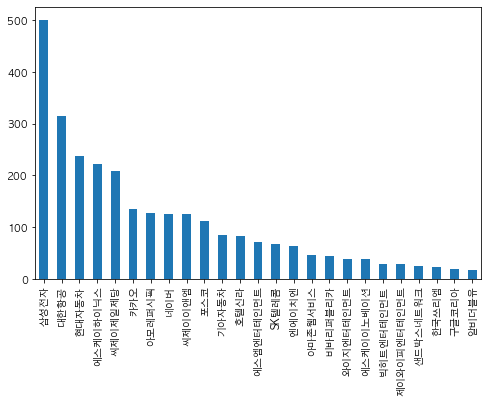

In [12]:
df.company.value_counts()[:25].plot(kind='bar', figsize = (8,5))
plt.show()

### 2-2. 2019년 50여개의 회사별 지원자의 직급 
- 사원 직급의 구직자들이 가장 활발하게 구직 활동을 하고 있다
- 직급이 높을수록 구직하는 비율이 현저히 낮아짐

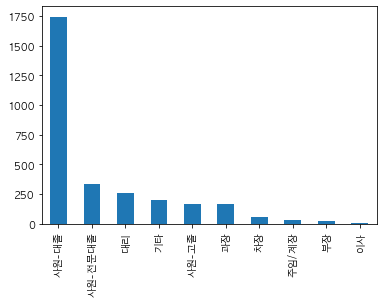

In [13]:
df.title.value_counts().plot(kind='bar', figsize = (6,4))
plt.show()

### 2-3. 2019년 50여개의 회사별 <사원-대졸>의 지원 부서
- IT/인터넷 부서와 서비스/고객지원 부서가 사원 직급의 구직자들에게 가장 인기가 있음
- 법률/법무, 영업/제휴, 인사/총무 부서에 낮은 지원율을 보임

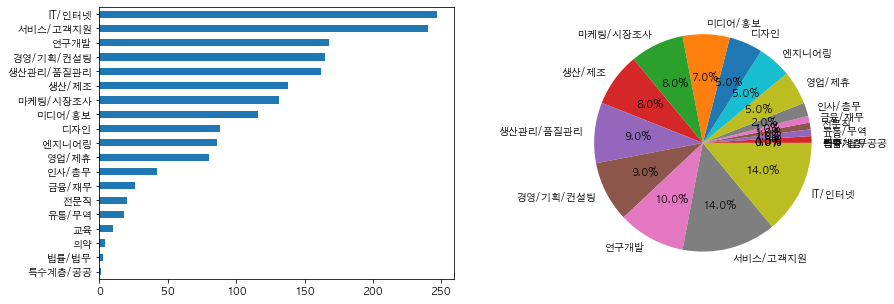

In [14]:
bar_pie_graph(df, 'dptment', 'title', '사원-대졸')

### 2-3. 2019년 50여개의 회사별 합격률
- 지원자의 반은 합격 했다고 추정 가능

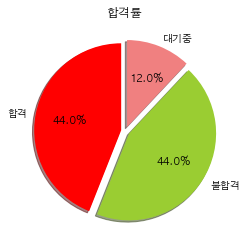

In [15]:
query = df['result'].value_counts()
total_sum = query.values.sum()
    
lab_lst = []
val_lst = []

for label, value in zip(query.index, query.values):
    lab_lst.append(label)
    val_lst.append(value)

ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',
                shadow = True, startangle = 90,
                explode = (0.05,0.05,0.05),
                colors = ['red','yellowgreen','lightcoral'])
sen ='합격률'

plt.title(sen)
plt.show()


# 2. 빅히트엔터테인먼트에 지원하는 사람들의 특성
- 구직/구인 사이트의 면접 후기를 활용하여 지원자들의 특성 확인
    - 공시자료와 공공통계 자료는 귀사가 공식적으로 요구하여 취득 해야하므로 이번 분석에선 제외 함
- 잡 플래닛의 면접 후기로 지원자의 특성 확인
    - 타 구직/구인 사이트의 면접 후기를 볼 수 있는데 제약이 있습니다.
        - (개인계정 및 유료 회원에게만 한함)
    - 회사의 계정으로 로그인 시 현재의 제약이 미미할거라 추정하고 있습니다.
- 지원자를 크게 12개의 특성을 가지고 데이터를 수집
- 이후 단순 쿼리 분석으로 지원자의 특성을 파악

### 2-1. 지원자 직급 분석
- 지원자 직급 중 "사원-대졸"이 가장 많은 분포를 보임
- 초년생이 많다고 가정 할 수 있음

In [16]:
bighit = df[df.company == '빅히트엔터테인먼트']

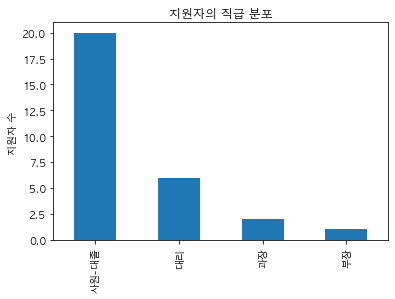

In [17]:
bighit.title.value_counts().plot(kind = 'bar')
plt.title("지원자의 직급 분포")
plt.ylabel("지원자 수 ")
plt.show()

In [98]:
def bar_pie_graph2(df, by):
    query = df[str(by)].value_counts(ascending = True)
    
    total_sum = query.values.sum()
    lab_lst = []
    val_lst = []
    for label, value in zip(query.index, query.values):
        lab_lst.append(label)
        val_lst.append(value)    
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    query.plot(kind = 'barh')
    plt.subplot(1,2,2)
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',startangle=0, explode = (0.05,0.05))  
    plt.show()

### 2-2. 지원자의 지원 부서
- 빅히트에는 미디어 홍보 부서로 지원하는 구직자가 가장 많은 것으로 나타남
- 마케팅/시장조사 부서 역시 인기 있는 부서임

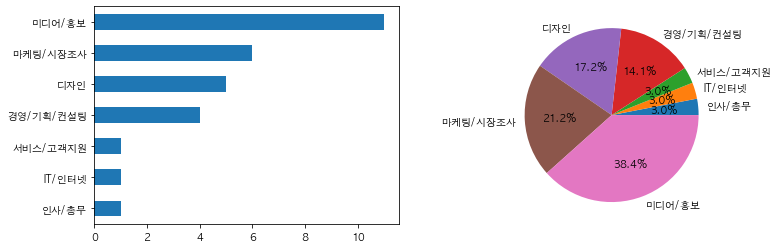

In [19]:
bar_pie_graph2(bighit,'dptment')

### 2-3. 지원자의 지원 경로
- 빅히트에는 온라인 지원과 헤드헌터의 지원 경로로 입사 지원이 많음

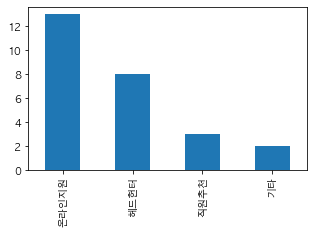

In [29]:
bighit['route'].value_counts().plot(kind = 'bar', figsize = (5,3))
plt.show()

#### 2-4. 지원자의 합격률


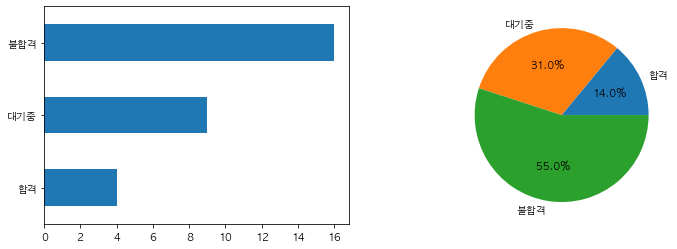

In [21]:
bar_pie_graph2(bighit,'result')

# 3. 빅히트 회사 이미지 Analysis
- 머신러닝/딥러닝을 이용한 한글 의미 분석
    - 모든 리뷰를 긁어서 데이터로 남겼지만, 모든 글을 읽는 것은 많은 시간과 집중이 요함
    - 편의를 위하여 머신러닝/딥러닝 모델을 이용하여 리뷰가 긍정적인지 부정적인지 나눌거임
- 한글의 형태소를 나눠 분석
    - 텍스트 분석은 단어의 형태소 명사, 조사, 형용사, 조사 등등에 큰 의미를 부여함
    - 모든 댓글을 형태소 단위로 나눠서 분석
- 네이버 영화/댓글 데이터로 긍정적인지 부정적인지 학습을 시킴 
    - (머신러닝/딥러닝 학습을 위해선 큰 데이터가 필요함 (최소 100만)
    - 1000만개의 댓글 데이터를 가지고 있는 네이버로 충분한 학습을 시킴
    - 시간이 굉장히 오래 걸린다는 단점 (일 단위)
- 네이버 데이터로 학습시킨 머신러닝/딥러닝을 빅히트 면접 후기에 적용
    - 긍정과 부정으로 나누게 실시함
    - 머신러닝/딥러닝의 정확성을 위해선 모델의 튜닝 작업이 필요 함
    - 튜닝 작업은 머신러닝/딥러닝 모델링 중 시간이 오래 걸리므로 기본 모델링으로 평가함 (정확성 83%)
- 리뷰 평가
    - 83%의 정확도를 고려하고 참고용으로 사용
    - 튜닝을 통하여 정확도를 95% 이상을 끌어 올릴시 상용화 가능함
    - 모델 튜닝은 고도화 작업이 필요하므로 하루 이틀만에 끝내기에는 무리가 있음
        - 여러 모델들을 조합하고 평가 분석 실시 해야함

In [72]:
bighit.columns

Index(['company', 'user_id', 'dptment', 'title', 'jp_date', 'difficult',
       'on_date', 'route', 'headline', 'question', 'thought', 'duration',
       'result', 'experience'],
      dtype='object')

In [82]:
bighit.head()

,company,user_id,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience
0,빅히트엔터테인먼트,770112,마케팅/시장조사,대리,2019-12-05,보통,2019-10-01,기타,서류 합격 후 면접 관련 안내는 이메일을 통해서 통지됨. 면접 안내하시는 분 굉장히...,1. 왜 해당 직무를 선택하였는지. 성격의 장단점3. 지금 다니고 있는 회사와 빅히...,회사가 지금 커져가고있다는 점을 굉장히 많이 크게 강조함입사하면 바쁠거라는점......,7.0,불합격,보통
1,빅히트엔터테인먼트,769347,미디어/홍보,사원-대졸,2019-12-04,보통,NaN,NaN,비교적 자유로운 분위기였으며 긴장을 덜어주시려고 해주셔서 감사합니다,최근 트렌드에 대해 알고계시나요?(장르불문)상사와 의견이 맞지 않는다면 어떻게 대처...,NaN,30.0,대기중,긍정적
2,빅히트엔터테인먼트,768930,디자인,사원-대졸,2019-12-04,보통,2019-09-01,온라인지원,"전체적으로 밝은 느낌이였으나, 일부러 어려운 용어를 써가며 질문을 하려는 태도에서 ...","다소 불편한 질문들이 많았는데, 그 중 프로그램 용어에 대해 아는지에 대한 여부를 ...",뭐 아는대로 대답했긴 했지만 썩 표정이 안좋았다.,5.0,합격,부정적
3,빅히트엔터테인먼트,764312,마케팅/시장조사,과장,2019-11-26,보통,2019-08-01,기타,"서류 제출 후 빠르게 면접 일정 조율, 면접 가능 일정 체크 후 전화, 이메일로 리...","자신의 성격의 장단점, 경력 중 가장 자신의 능력을 발휘했던 업무는?",기술했던 경력 중 최초 아이디어부터 진행까지 모든 부분에 인볼브했던 경험를 자세하...,7.0,불합격,보통
4,빅히트엔터테인먼트,760417,경영/기획/컨설팅,사원-대졸,2019-11-20,어려움,2019-10-01,온라인지원,"공식 채용사이트에 등록 후 일주일 이내 연락.. 전화, 문자, 메일 순차 통보","직무에 대해 굉장히 진지하게 물어봅니다.직무의 현 방향성과 추후 방향성, 앞으로 본...","생각을 솔직하게 이야기했습니다면접 질문에 정답은 없다고는 하지만,항상 정답은 있는...",7.0,불합격,부정적


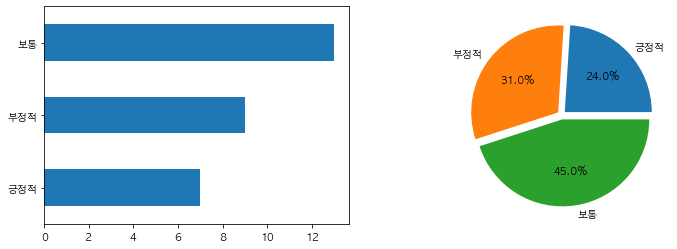

In [86]:
bar_pie_graph2(bighit,'experience')

### 3-1. Load Naver Data
- 네이버의 댓글 데이터로 머신 러닝 모델에 훈련

#### Train data

In [22]:
train = pd.read_csv('ratings_train.txt', delimiter = "\t")
print(train.shape)
train.head()

(150000, 3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


#### Test data

In [23]:
test = pd.read_csv('ratings_test.txt', delimiter = "\t")
print(test.shape)
test.head()

(50000, 3)


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


### 3-2. Data Preprocessing

#### Tokenizing

In [24]:
from konlpy.tag import Okt
okt = Okt()

def re_norm(i):
    return re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]',"",str(i))

def tokenize(doc):
    return ['/'.join(i) for i in okt.pos(re_norm(doc))]

#### 훈련 데이터 토크나이징

In [25]:
%%time
train_docs = []
for i in train.document:
    try:
        train_docs.append(tokenize(i))
    except TypeError:
        pass
len(train_docs)
train_docs[:2]

CPU times: user 4min 39s, sys: 1.58 s, total: 4min 41s
Wall time: 4min 29s


[['아/Exclamation', '더빙/Noun', '진짜/Noun', '짜증나네요/Adjective', '목소리/Noun'],
 ['흠/Noun',
  '포스터/Noun',
  '보고/Noun',
  '초딩/Noun',
  '영화/Noun',
  '줄/Noun',
  '오버/Noun',
  '연기/Noun',
  '조차/Josa',
  '가볍지/Adjective',
  '않구나/Verb']]

#### 테스트 데이터 토크나이징

In [26]:
%%time
test_docs = []
for i in test.document:
    try:
        test_docs.append(tokenize(i))
    except TypeError:
        pass
len(test_docs)
test_docs[:2]

CPU times: user 1min 29s, sys: 368 ms, total: 1min 29s
Wall time: 1min 29s


[['굳/Adjective', 'ㅋ/KoreanParticle'], ['GDNTOPCLASSINTHECLUB/Alpha']]

#### 토크나이징 된 훈련 데이터와 테스트 데이터 결과
- 훈련 데이터에 200만 단어 
- 테스트 데이터에 65만 단어

In [27]:
train_tokens = [k for i in train_docs for k in i]
test_tokens = [k for i in test_docs for k in i]
print(len(train_tokens), len(test_tokens))

1952395 654075


#### 유니크한 단어 개수 

In [38]:
import nltk
train_text = nltk.Text(train_tokens, name = 'NMSC')
print("Total token count:",len(train_text.tokens))
print("Total Unique token count:",len(set(train_text.tokens)))

Total token count: 1952395
Total Unique token count: 105691


#### Bag of Words
- 가장 많이 쓰는 단어 10000개를 가지고 머신러닝 입력값에 인자값으로 사용

In [32]:
common_words = train_text.vocab().most_common(10000)
common_words[:10]

[('영화/Noun', 50598),
 ('이/Josa', 38602),
 ('의/Josa', 30272),
 ('가/Josa', 26619),
 ('에/Josa', 26413),
 ('을/Josa', 23083),
 ('도/Josa', 19923),
 ('들/Suffix', 18113),
 ('는/Josa', 16899),
 ('를/Josa', 15679)]

In [34]:
selected_word = [i[0] for i in common_words]
selected_word[:10]

['영화/Noun',
 '이/Josa',
 '의/Josa',
 '가/Josa',
 '에/Josa',
 '을/Josa',
 '도/Josa',
 '들/Suffix',
 '는/Josa',
 '를/Josa']

In [35]:
def term_frequency(doc):
    return [doc.count(i) for i in selected_word]


In [36]:
%%time
x_train_pre = [term_frequency(i) for i in train_docs]
x_test_pre = [term_frequency(i) for i in test_docs]
y_train_pre = [i for i in train.label]
y_test_pre = [i for i in test.label]

CPU times: user 7min 36s, sys: 28.2 s, total: 8min 4s
Wall time: 8min 9s


In [37]:
%%time
x_train = np.asarray(x_train_pre).astype('float32')
x_test = np.asarray(x_test_pre).astype('float32')
y_train = np.asarray(y_train_pre).astype('float32')
y_test = np.asarray(y_test_pre).astype('float32')

CPU times: user 2min 4s, sys: 52.4 s, total: 2min 56s
Wall time: 3min 13s


### 3-3. Basic Deep Learning Model

In [39]:
from tensorflow.keras import models, layers, optimizers, losses, metrics

#### 2개 층을 이용한 딥러닝

In [78]:
%%time
model = models.Sequential()
model.add(layers.Dense(64, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'softmax'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

#### 딥러닝 모델에게 20번 학습 시키기

In [54]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss')

In [79]:
%%time
history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.1,
                    batch_size = 32, callbacks = [early_stopping])

Train on 135000 samples, validate on 15000 samples
Epoch 1/10
135000/135000 [==============================] - 50s 373us/sample - loss: 0.4807 - acc: 0.8103 - val_loss: 0.3733 - val_acc: 0.8439
Epoch 2/10
135000/135000 [==============================] - 48s 359us/sample - loss: 0.3829 - acc: 0.8502 - val_loss: 0.3511 - val_acc: 0.8467
Epoch 3/10
135000/135000 [==============================] - 51s 380us/sample - loss: 0.3543 - acc: 0.8587 - val_loss: 0.3512 - val_acc: 0.8493
CPU times: user 5min 53s, sys: 20 s, total: 6min 13s
Wall time: 2min 30s


#### 딥러닝 결과 정확도 84%

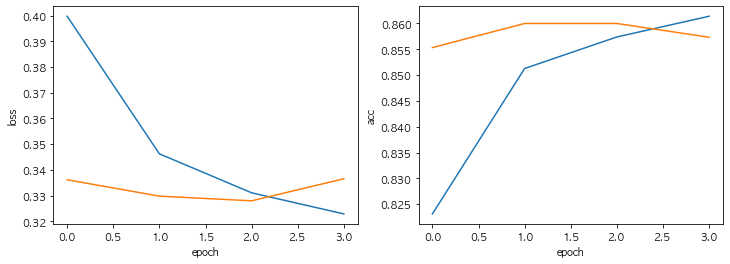

In [56]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 4))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

ax2.plot(history.history['acc'])
ax2.plot(history.history['val_acc'])
ax2.set_xlabel('epoch')
ax2.set_ylabel('acc')
plt.show()

In [73]:
model.evaluate(x_test, y_test)

50000/50000 [==============================] - 5s 99us/sample - loss: 0.3667 - acc: 0.8404


[0.3667302933835983, 0.84042]

#### 딥러닝의 결과로 빅히트 면접 리뷰 긍정/부정 테스트

In [100]:

def test_review(i):
    token = tokenize(i)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis = 0)
    score = float(model.predict(data))
    if score < 0.5:
        sentiment = "긍정"
        print(colored(sentiment,'blue'), round(score * 100,2),'% \n', i)
        print()
#     elif (score < 0.8) and (score >= 0.3):
#         print(colored("Neutral",'green'), round(score * 100,2),'% \n', i)
#         print()
    else:
        sentiment = "부정"
        print(colored(sentiment,'red'), round((1-score) * 100,2),'% \n', i)
        print()
    return sentiment

#### 빅히트 면접 후기 텍스트에 머신러닝/딥러닝 모델 적용하여 감정 분석

In [101]:
val_lst = []
for i in bighit.thought:
    val = test_review(i)
    val_lst.append(val)

긍정 8.38 % 
  회사가 지금 커져가고있다는 점을 굉장히 많이 크게 강조함입사하면 바쁠거라는점... 무한 연차도 언급하셨음.

긍정 45.31 % 
 nan

부정 39.97 % 
  뭐 아는대로 대답했긴 했지만 썩 표정이 안좋았다.

긍정 7.93 % 
  기술했던 경력 중 최초 아이디어부터 진행까지 모든 부분에 인볼브했던 경험를 자세하게 답변

부정 23.19 % 
  생각을 솔직하게 이야기했습니다면접 질문에 정답은 없다고는 하지만,항상 정답은 있는 기분입니다.그 정답을 찾기 위해 고민했습니다

긍정 6.68 % 
  중간중간 짜투리 시간을 잘 활용하여 효율적으로 일하겠다고 밝힘

부정 21.54 % 
  그냥 질문에 대한 적절한 답변들을 했던 것 같음 분위기는 나쁘지 않았음. 면접관님이 하신 말씀 중에.. 회사가 너무 좋아서 하루종일 회사에서 머물고 상주하며, 같이 일하고 야근하는게 일상같고 행복해서 집에 가고싶지가 않다면 이회사는 평점이 5점만점이어야 하는데 왜 .0밖에 안될까요? .. 너무 가식적이어도 보기 좋지 않습니다.

부정 42.94 % 
  실무진 태도가 매우 불량. 기분나쁘게 사람 훑고 비웃기를 반복함. 노트북 화면 보면서 타자 치는데, 표정이나 눈치가 채팅하는 것 처럼 보였음. 각종 후기에서 봤던 안좋은 인상들을 나역시 첫만남에 확인할 수 있었음

부정 21.77 % 
  당연히 야근을 바라고 하는 질문이었다

긍정 45.31 % 
 nan

긍정 43.35 % 
  질문 하는 것을 보니 어떤 사람을 원하는지는 알겠으나 실제로 근무 하는 사람들이 그런 사람들인지는 알 수가 없는일.

부정 3.86 % 
  가수에 대해 대답했고, 회사의 장단점을 생각나는 대로 이야기했고, 요새 가장 잘나가는 회사라서 지원

부정 40.37 % 
  그냥 아는대로 대답

긍정 45.31 % 
 nan

긍정 6.59 % 
  작업에 대해서 내 생각을 이야기함 솔직히 어느 정도 예상만 되지. 무슨 직무인지 우예암. 애초에 포폴 보고 내 작업성향 성격 다 

#### 기존 빅히트 데이터에 감정 분석 결과 파생 변수로 추가

In [106]:
bighit['emotion'] = val_lst
bighit

/Users/jaygykay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,company,user_id,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience,emotion
0,빅히트엔터테인먼트,770112,마케팅/시장조사,대리,2019-12-05,보통,2019-10-01,기타,서류 합격 후 면접 관련 안내는 이메일을 통해서 통지됨. 면접 안내하시는 분 굉장히...,1. 왜 해당 직무를 선택하였는지. 성격의 장단점3. 지금 다니고 있는 회사와 빅히...,회사가 지금 커져가고있다는 점을 굉장히 많이 크게 강조함입사하면 바쁠거라는점......,7.0,불합격,보통,긍정
1,빅히트엔터테인먼트,769347,미디어/홍보,사원-대졸,2019-12-04,보통,NaN,NaN,비교적 자유로운 분위기였으며 긴장을 덜어주시려고 해주셔서 감사합니다,최근 트렌드에 대해 알고계시나요?(장르불문)상사와 의견이 맞지 않는다면 어떻게 대처...,NaN,30.0,대기중,긍정적,긍정
2,빅히트엔터테인먼트,768930,디자인,사원-대졸,2019-12-04,보통,2019-09-01,온라인지원,"전체적으로 밝은 느낌이였으나, 일부러 어려운 용어를 써가며 질문을 하려는 태도에서 ...","다소 불편한 질문들이 많았는데, 그 중 프로그램 용어에 대해 아는지에 대한 여부를 ...",뭐 아는대로 대답했긴 했지만 썩 표정이 안좋았다.,5.0,합격,부정적,부정
3,빅히트엔터테인먼트,764312,마케팅/시장조사,과장,2019-11-26,보통,2019-08-01,기타,"서류 제출 후 빠르게 면접 일정 조율, 면접 가능 일정 체크 후 전화, 이메일로 리...","자신의 성격의 장단점, 경력 중 가장 자신의 능력을 발휘했던 업무는?",기술했던 경력 중 최초 아이디어부터 진행까지 모든 부분에 인볼브했던 경험를 자세하...,7.0,불합격,보통,긍정
4,빅히트엔터테인먼트,760417,경영/기획/컨설팅,사원-대졸,2019-11-20,어려움,2019-10-01,온라인지원,"공식 채용사이트에 등록 후 일주일 이내 연락.. 전화, 문자, 메일 순차 통보","직무에 대해 굉장히 진지하게 물어봅니다.직무의 현 방향성과 추후 방향성, 앞으로 본...","생각을 솔직하게 이야기했습니다면접 질문에 정답은 없다고는 하지만,항상 정답은 있는...",7.0,불합격,부정적,부정
5,빅히트엔터테인먼트,755818,미디어/홍보,사원-대졸,2019-11-13,보통,2019-01-01,헤드헌터,"지인의 해드헌터를 통해 알려진 뒤 4~5번 정도의 면접을 봄. 팀 구성원, 인사팀장...",일하면서 개인의 시간이 많이 없어질 수 있는데 괜찮은가?,중간중간 짜투리 시간을 잘 활용하여 효율적으로 일하겠다고 밝힘,NaN,합격,보통,긍정
6,빅히트엔터테인먼트,726401,디자인,대리,2019-09-26,쉬움,2019-02-01,온라인지원,문자와 전화로 서류합격여부통보 후 전날 리마인드 문자 한번 더 줬음. 면접 진행 후...,실무 위주의 질문과 포트폴리오에 관련된 질문 전에 일해왔던 방식과 디자인 한것에 대...,그냥 질문에 대한 적절한 답변들을 했던 것 같음 분위기는 나쁘지 않았음. 면접관님...,NaN,대기중,보통,부정
7,빅히트엔터테인먼트,719725,미디어/홍보,사원-대졸,2019-09-15,쉬움,2019-09-01,헤드헌터,"면접 전 사전 과제 제출, 실무진 들어와서 면접. 임원급 직원이 주로 실무 관련 질문","실무 경험에 대한 질문과 지원 동기, 회사에 궁금한 점 있는지",실무진 태도가 매우 불량. 기분나쁘게 사람 훑고 비웃기를 반복함. 노트북 화면 보...,7.0,불합격,부정적,부정
8,빅히트엔터테인먼트,716241,미디어/홍보,사원-대졸,2019-09-06,어려움,2018-10-01,직원추천,총 3번의 면접. 업무 능력도 보고 인성 면접을 두 번 봄,워라밸에 대해서 어떻게 생각하는지야근이 많은데 할 수 있는지,당연히 야근을 바라고 하는 질문이었다,10.0,불합격,부정적,부정
9,빅히트엔터테인먼트,715343,미디어/홍보,사원-대졸,2019-09-05,보통,NaN,온라인지원,"메일 또는 전화로 안내, 전날에 리마인드 문자를 보내주셨습니다. 서류-실무-인사담당...",전형적인 면접 질문을 들었습니다. 30~1시간 정도 걸립니다. 분위기는 편했습니다....,NaN,7.0,불합격,긍정적,긍정


#### 감정 분석 결과 
- 48% 긍정
- 52% 부정

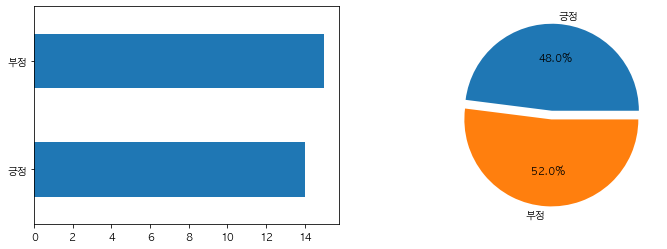

In [107]:
bar_pie_graph2(bighit,'emotion')

In [108]:
bighit.to_csv('bighit.csv',index = False)

In [138]:
from IPython.display import display
from IPython.display import HTML

In [139]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')